<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 例題4.3

例題4.2の処理（パーセプトロンの学習規則）をPythonでコーディングせよ．ただし正解クラス1,2はそれぞれ0,1に読み替えてコーディングすること。

使用する関数等
- [numpy.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) 全要素が0のベクトル・行列を作成

- [numpy.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) 全要素が1のベクトル・行列を作成

- [numpy.hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html) ベクトル・行列を横方向に結合

- numpyの@演算子 （[numpy.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)と同じ） 行列の積を求める

データの準備と表示

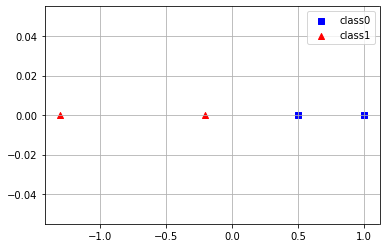

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0], [0.5], [-0.2], [-1.3]])
y = np.array([0, 0, 1, 1])
plt.grid()
plt.scatter(X[y==0], np.zeros(len(X[y==0])), c='blue', marker='s', label='class0')
plt.scatter(X[y==1], np.zeros(len(X[y==1])), c='red', marker='^', label='class1')
plt.legend(loc='upper right')

学習の設定と特徴ベクトルの次元拡張（$x_0 \equiv 1$）

In [2]:
roh = 0.5                 # 学習係数
w = np.array([0.2, 0.3])  # 重みの初期値
flag = True               # 学習終了判定用フラグ
(n, d) = X.shape
X2 = np.hstack([np.ones((n, d)), X])  # 特徴ベクトルをd+1次元に拡張
print(X2)

[[ 1.   1. ]
 [ 1.   0.5]
 [ 1.  -0.2]
 [ 1.  -1.3]]


以下のセルに、学習を実行するコードと得られた重みを表示するコードを記述せよ。

### 機械学習ライブラリ scikit-learn, mlxtend を利用したコード

乱数を用いて学習データを生成し、パーセプトロンの学習を実行するインスタンスを生成して学習する。そして、得られた識別面を機械学習用拡張ライブラリmlxtendを用いて表示する。

使用するクラス、メソッド
- [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) データの生成

- [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) パーセプトロン

- [plot_decision_regions](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) 識別面の表示



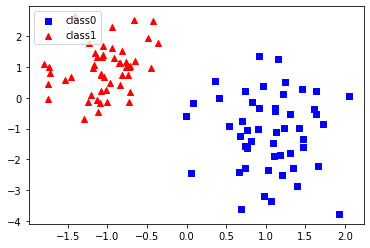

In [4]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=8)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='blue', marker='s', label='class0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red', marker='^', label='class1')
plt.legend(loc='upper left')

以下のセルに、学習を実行するコードと得られた識別面を表示するコードを記述せよ。

## 例題4.5

例題4.4の処理を Python でコーディングし、x=(3,4) を識別せよ．ただし正解クラス1,2はそれぞれ0,1に読み替えてコーディングすること。

使用する関数

- [numpy.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) ノルムを求める

- [numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) ソート結果のインデックスを求める

- [scipy.stats.mode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) 最頻値を求める

データの準備と表示

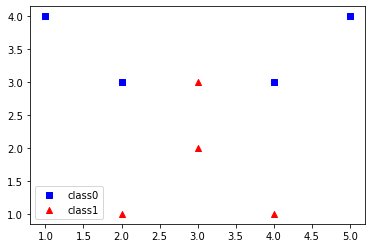

In [6]:
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt

X = np.array([[1,4], [2,3], [4,3], [5,4], [2,1], [3,2], [3,3], [4,1]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='blue', marker='s', label='class0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red', marker='^', label='class1')
plt.legend(loc='lower left')

学習の設定

In [7]:
k = 3
x = np.array([3,4])

以下のセルに、k-NN法によってxを識別するコードを記述せよ。

### 機械学習ライブラリ scikit-learn を利用したk-NN法のコード

乱数を用いて学習データを生成し、k-NN法によって得られる識別面をmlxtendを用いて表示する。


使用するクラス、メソッド
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

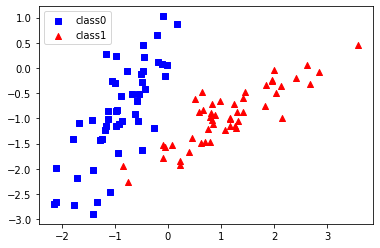

In [9]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=5)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='blue', marker='s', label='class0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red', marker='^', label='class1')
plt.legend(loc='upper left')

以下のセルに、k-NN法による識別器を作成し、識別面を表示するコードを記述せよ。

# 解答例

例題4.3

In [ ]:
while flag:
    flag = False
    for (x, t) in zip(X2, y):
        print(f'w = {w}')
        g = x @ w
        if t == 0 and g < 0:
            w = w + roh * x
            flag = True
        elif t == 1 and g > 0:
            w = w - roh * x
            flag = True
    print('-----') 
print(f'result: {w}')

In [ ]:
clf = Perceptron(eta0 = 0.1, random_state=3)
clf.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

例題4.5

In [ ]:
mode_val, mode_num = mode(y[np.argsort(np.linalg.norm(X - x, axis=1))][:k])
print(f'result = class{mode_val[0]}')

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)